                   ### ================DATA EXPLORATION================= 
Nom:Ines Yaici et Céline Daou

Date:11/02/2026

Objectif : Explorer les données de MIMIC-III

In [1]:
# import 
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [5]:
#==================================
# 2.Chargements des données 
#==================================
print("chargement des données....")
notes= pd.read_csv('/Users/ines/m-dic-AIde/data/raw/NOTEEVENTS_random.csv')
diagnoses=pd.read_csv('/Users/ines/m-dic-AIde/data/raw/DIAGNOSES_ICD_random.csv')
d_icd_diag =pd.read_csv('/Users/ines/m-dic-AIde/data/raw/D_ICD_DIAGNOSES.csv')
d_icd_proc=pd.read_csv("/Users/ines/m-dic-AIde/data/raw/D_ICD_PROCEDURES.csv")
print("tous les fichiers ont été chargés avec succés")


chargement des données....


/var/folders/rk/lx_hryp913x75xkqm9xb8fd40000gn/T/ipykernel_88149/424036787.py:5: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  notes= pd.read_csv('/Users/ines/m-dic-AIde/data/raw/NOTEEVENTS_random.csv')


tous les fichiers ont été chargés avec succés


### ============================================
### 3. EXPLORATION - NOTEEVENTS (Notes médicales)
### ============================================

In [ ]:
print("="*60)
print("EXPLORATION - NOTEEVENTS (Notes médicales)")
print("="*60)
#3.1 Dimensions
print(f"\n Dimensions : {notes.shape[0]:,}lignes x {notes.shape[1]:,} colonnes")

EXPLORATION - NOTEEVENTS (Notes médicales)

 Dimensions : 458,090lignes x 11 colonnes


In [10]:
# 3.2 colonnes et types de données
print("\n Colonnes et types de données :")
print(notes.dtypes)


 Colonnes et types de données :
ROW_ID           int64
SUBJECT_ID       int64
HADM_ID        float64
CHARTDATE       object
CHARTTIME       object
STORETIME       object
CATEGORY        object
DESCRIPTION     object
CGID           float64
ISERROR        float64
TEXT            object
dtype: object


In [11]:
#3.3 Aperçu des premiéres lignes 
print("\n Aperçu des premières lignes :")
print(notes.head(5))


 Aperçu des premières lignes :
   ROW_ID  SUBJECT_ID   HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     175       13702  107527.0  2118-06-14       NaN       NaN   
1     176       13702  167118.0  2119-05-25       NaN       NaN   
2     177       13702  196489.0  2124-08-18       NaN       NaN   
3     180       20646  134727.0  2112-12-10       NaN       NaN   
4     184       28063  121936.0  2125-02-16       NaN       NaN   

            CATEGORY DESCRIPTION  CGID  ISERROR  \
0  Discharge summary      Report   NaN      NaN   
1  Discharge summary      Report   NaN      NaN   
2  Discharge summary      Report   NaN      NaN   
3  Discharge summary      Report   NaN      NaN   
4  Discharge summary      Report   NaN      NaN   

                                                TEXT  
0  Admission Date:  [**2118-6-2**]       Discharg...  
1  Admission Date:  [**2119-5-4**]              D...  
2  Admission Date:  [**2124-7-21**]              ...  
3  Admission Date:  [**2112-12-8**]   

In [12]:
# 3.4 Valeurs manquantes 
print("\n Valeurs manquantes :")
missing=notes.isnull().sum()
missing_pct=(missing/len(notes))*100
missing_df=pd.DataFrame({
    'Missing':missing,
    'Percentage':missing_pct
})
print(missing_df[missing_df['Missing'] > 0].sort_values('Missing', ascending=False))


 Valeurs manquantes :
           Missing  Percentage
ISERROR     457911   99.960925
STORETIME   182086   39.748958
CGID        182086   39.748958
CHARTTIME    68578   14.970421
HADM_ID      49656   10.839791


In [13]:
# 3.5 Distribution des types de notes 
print("\n Distribution des types de notes :")
category_dist=notes['CATEGORY'].value_counts()
print(category_dist)


 Distribution des types de notes :
CATEGORY
Nursing/other        178980
Radiology            113986
Nursing               50874
ECG                   45121
Physician             32145
Discharge summary     12981
Echo                   9998
Respiratory            7663
Nutrition              2211
General                1902
Rehab Services         1336
Social Work             601
Case Management         231
Pharmacy                 35
Consult                  26
Name: count, dtype: int64


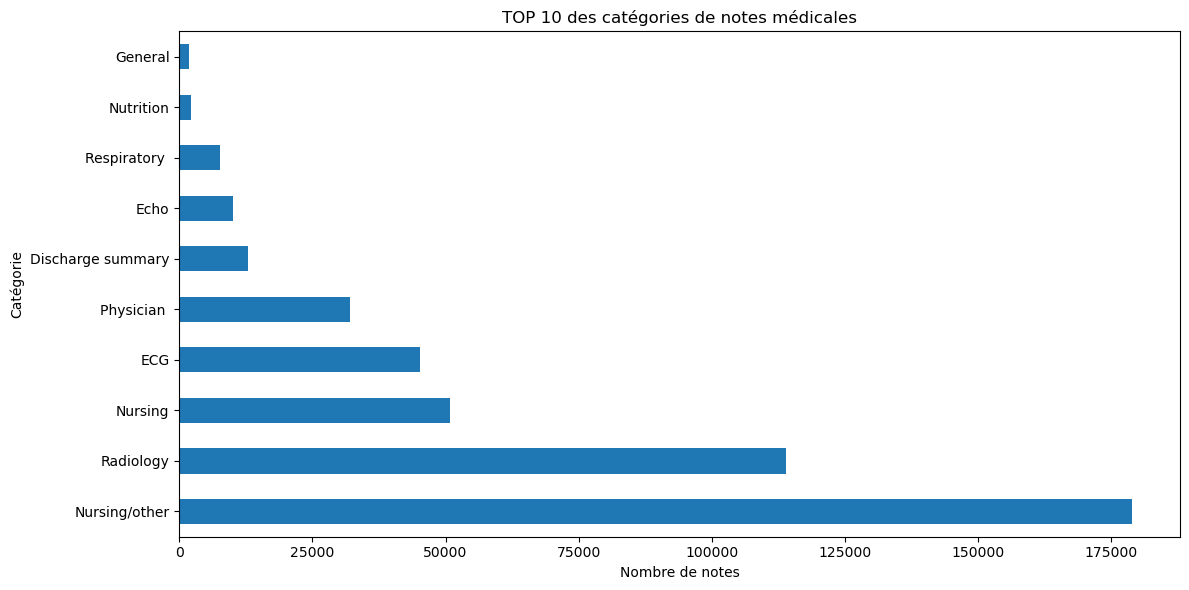

In [14]:
#Visusualisation 
plt.figure(figsize=(12,6))
category_dist.head(10).plot(kind='barh')
plt.title('TOP 10 des catégories de notes médicales')
plt.xlabel("Nombre de notes")
plt.ylabel("Catégorie")
plt.tight_layout()
plt.show()

In [15]:
# 3.6 Longueur des textes
print("\n📏 Statistiques sur la longueur des textes :")
notes['text_length'] = notes['TEXT'].fillna('').str.len()
print(notes['text_length'].describe())


📏 Statistiques sur la longueur des textes :
count    458090.000000
mean       1846.015493
std        2527.032374
min           3.000000
25%         433.000000
50%        1101.000000
75%        1882.000000
max       55728.000000
Name: text_length, dtype: float64


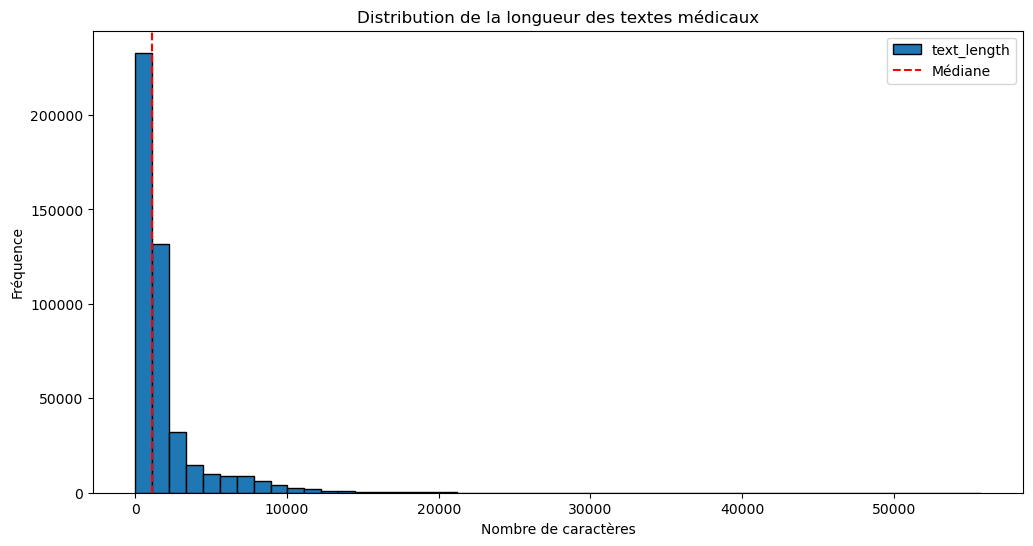

In [16]:
# Visualisation distribution longueurs
plt.figure(figsize=(12, 6))
notes['text_length'].plot(kind='hist', bins=50, edgecolor='black')
plt.title('Distribution de la longueur des textes médicaux')
plt.xlabel('Nombre de caractères')
plt.ylabel('Fréquence')
plt.axvline(notes['text_length'].median(), color='red', linestyle='--', label='Médiane')
plt.legend()
plt.show()

In [17]:
# 3.7 Exemple de NOTE COMPLÈTE
print("\n📝 Exemple de note médicale (Discharge summary) :")
discharge = notes[notes['CATEGORY'] == 'Discharge summary']
if len(discharge) > 0:
    example_text = discharge.iloc[0]['TEXT']
    print(f"\n{example_text[:1000]}...")  # Premiers 1000 caractères
else:
    print("Aucune Discharge summary trouvée")


📝 Exemple de note médicale (Discharge summary) :

Admission Date:  [**2118-6-2**]       Discharge Date:  [**2118-6-14**]

Date of Birth:                    Sex:  F

Service:  MICU and then to [**Doctor Last Name **] Medicine

HISTORY OF PRESENT ILLNESS:  This is an 81-year-old female
with a history of emphysema (not on home O2), who presents
with three days of shortness of breath thought by her primary
care doctor to be a COPD flare.  Two days prior to admission,
she was started on a prednisone taper and one day prior to
admission she required oxygen at home in order to maintain
oxygen saturation greater than 90%.  She has also been on
levofloxacin and nebulizers, and was not getting better, and
presented to the [**Hospital1 18**] Emergency Room.

In the [**Hospital3 **] Emergency Room, her oxygen saturation was
100% on CPAP.  She was not able to be weaned off of this
despite nebulizer treatment and Solu-Medrol 125 mg IV x2.

Review of systems is negative for the following:  Fevers,
c

In [19]:
# 3.8 Nombre de patients uniques
print(f"\n👥 Nombre de patients uniques : {notes['SUBJECT_ID'].nunique():,}")
print(f"👥 Nombre d'hospitalisations uniques : {notes['HADM_ID'].nunique():,}")

# 3.9 Notes par patient
notes_per_patient = notes.groupby('SUBJECT_ID').size()
print(f"\n Notes par patient :")
print(f"  - Moyenne : {notes_per_patient.mean():.1f}")
print(f"  - Médiane : {notes_per_patient.median():.0f}")
print(f"  - Max : {notes_per_patient.max()}")


👥 Nombre de patients uniques : 10,000
👥 Nombre d'hospitalisations uniques : 12,722

 Notes par patient :
  - Moyenne : 45.8
  - Médiane : 21
  - Max : 1414


### ============================================
### 4. EXPLORATION - DIAGNOSES_ICD
### ============================================

In [20]:
#4.1 Dimensions 
print(f"\n Dimensions :{diagnoses.shape[0]:,} lignes x {diagnoses.shape[1]:,} colonnes")


 Dimensions :140,502 lignes x 5 colonnes


In [21]:
# 4.2 Aperçu des premiéres lignes
print("\n Aperçu des premières lignes :") 
print(diagnoses.head(5))


 Aperçu des premières lignes :
   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0    1488         112   174105      1.0     53100
1    1489         112   174105      2.0     41071
2    1490         112   174105      3.0      2859
3    1491         112   174105      4.0     41401
4    1492         112   174105      5.0       725


In [22]:
# 4.3 Valeurs manquantes 
print("\n Valeurs manquantes :")
missing_diag=diagnoses.isnull().sum()
missing_diag_pct=(missing_diag/len(diagnoses))*100
missing_diag_df=pd.DataFrame({
    'Missing': missing_diag,
    'Missing (%)': missing_diag_pct
})
print(missing_diag_df)


 Valeurs manquantes :
            Missing  Missing (%)
ROW_ID            0     0.000000
SUBJECT_ID        0     0.000000
HADM_ID           0     0.000000
SEQ_NUM           9     0.006406
ICD9_CODE         9     0.006406


In [23]:
# 4.4 Distribution SEQ_NUM(ordre des diagnostics)
print("\n Distribution de SEQ_NUM (ordre des diagnostics) :")
print(diagnoses['SEQ_NUM'].value_counts().sort_index().head(10))



 Distribution de SEQ_NUM (ordre des diagnostics) :
SEQ_NUM
1.0     12736
2.0     12643
3.0     12408
4.0     11822
5.0     11119
6.0     10328
7.0      9516
8.0      8650
9.0      7850
10.0     5881
Name: count, dtype: int64


In [24]:
# 4.5 Distribution des ICD les plus fréquents
print("\n Distribution des ICD les plus fréquents :")
top_codes=diagnoses['ICD9_CODE'].value_counts().head(20)
print(top_codes)


 Distribution des ICD les plus fréquents :
ICD9_CODE
4019     4386
4280     2821
42731    2808
41401    2711
25000    1925
5849     1919
2724     1862
51881    1600
5990     1390
53081    1383
2720     1229
V053     1217
V290     1173
2859     1169
2449     1060
486      1035
2762     1017
496       981
2851      969
5070      831
Name: count, dtype: int64


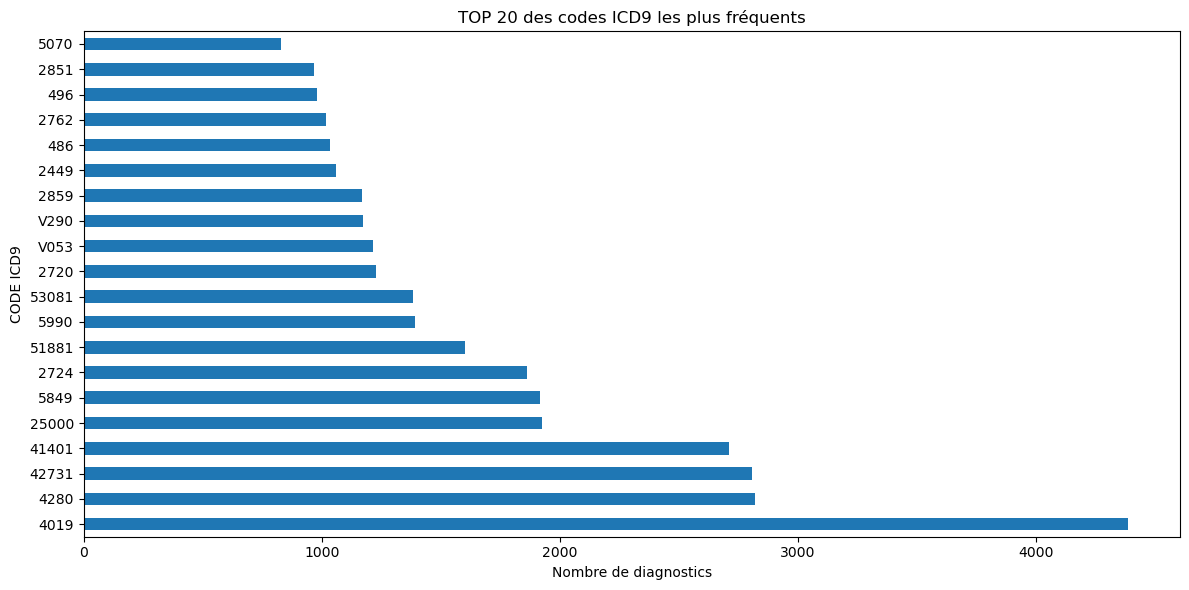

In [25]:
#Visualisation
plt.figure(figsize=(12,6))
top_codes.plot(kind='barh')
plt.title('TOP 20 des codes ICD9 les plus fréquents')
plt.xlabel("Nombre de diagnostics")
plt.ylabel("CODE ICD9")
plt.tight_layout()
plt.show()

In [26]:
# 4.6 Diagnostics principaux (SEQ_NUM = 1)
print("\n Top 20 diagnostics PRINCIPAUX :")
principal_diag = diagnoses[diagnoses['SEQ_NUM'] == 1]['ICD9_CODE'].value_counts().head(20)
print(principal_diag)


 Top 20 diagnostics PRINCIPAUX :
ICD9_CODE
V3000    782
41401    734
V3001    597
0389     445
41071    364
51881    247
431      232
4241     230
V3101    189
5070     158
486      147
4240     134
4280     120
5849     116
430      115
1983     102
41041     95
41011     93
5789      92
25013     83
Name: count, dtype: int64


In [27]:
# 4.7 Nombre de diagnostics par patient
diag_per_patient = diagnoses.groupby(['SUBJECT_ID', 'HADM_ID']).size()
print(f"\n📊 Nombre de diagnostics par hospitalisation :")
print(f"  - Moyenne : {diag_per_patient.mean():.1f}")
print(f"  - Médiane : {diag_per_patient.median():.0f}")
print(f"  - Max : {diag_per_patient.max()}")


📊 Nombre de diagnostics par hospitalisation :
  - Moyenne : 11.0
  - Médiane : 9
  - Max : 39


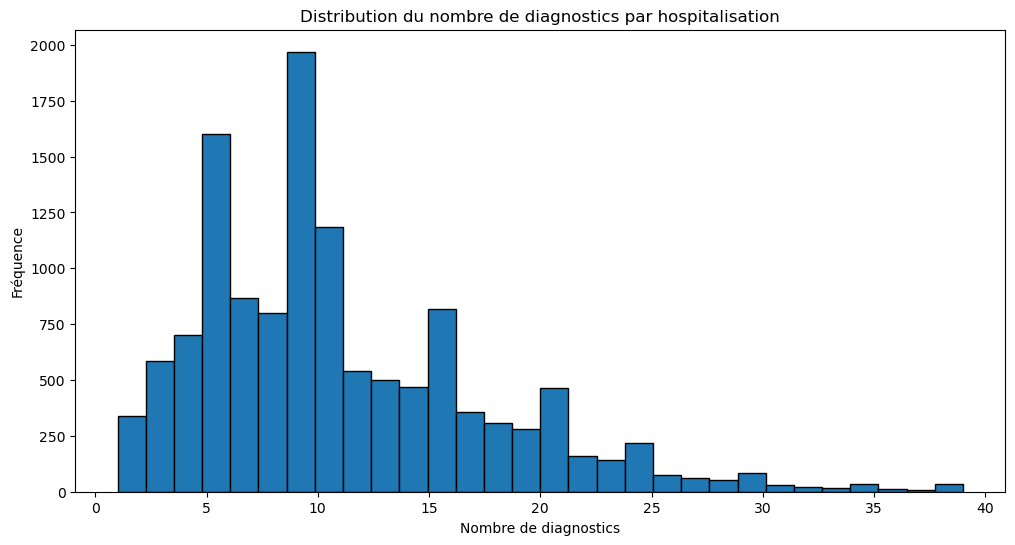

In [28]:
# Visualisation
plt.figure(figsize=(12, 6))
diag_per_patient.plot(kind='hist', bins=30, edgecolor='black')
plt.title('Distribution du nombre de diagnostics par hospitalisation')
plt.xlabel('Nombre de diagnostics')
plt.ylabel('Fréquence')
plt.show()

### ===============================================
###  5. EXPLORATION - D_ICD_DIAGNOSES (Dictionnaire)
### ===============================================

In [29]:
# 5.1 Dimensions 
print(f"\n Dimensions : {d_icd_diag.shape[0]:,} codes ICD-9 répertoriés")


 Dimensions : 14,567 codes ICD-9 répertoriés


In [30]:
# 5.2 Aperçu des premières lignes
print("\n Aperçu des premières lignes :") 
print(d_icd_diag.head(5))


 Aperçu des premières lignes :
   ROW_ID ICD9_CODE               SHORT_TITLE  \
0     174     01166     TB pneumonia-oth test   
1     175     01170    TB pneumothorax-unspec   
2     176     01171   TB pneumothorax-no exam   
3     177     01172  TB pneumothorx-exam unkn   
4     178     01173  TB pneumothorax-micro dx   

                                          LONG_TITLE  
0  Tuberculous pneumonia [any form], tubercle bac...  
1              Tuberculous pneumothorax, unspecified  
2  Tuberculous pneumothorax, bacteriological or h...  
3  Tuberculous pneumothorax, bacteriological or h...  
4  Tuberculous pneumothorax, tubercle bacilli fou...  


In [31]:
# 5.3 Vérifier si tous les codes de diagnostic_icd ont une desciption
codes_in_diagnoses = set(diagnoses['ICD9_CODE'].unique())
codes_in_dict = set(d_icd_diag['ICD9_CODE'].unique())

In [32]:
codes_sans_description = codes_in_diagnoses - codes_in_dict
print(f"\n Codes sans description dans le dictionnaire : {len(codes_sans_description)}")
if len(codes_sans_description) > 0:
    print(f"Exemples : {list(codes_sans_description)[:10]}")


 Codes sans description dans le dictionnaire : 109
Exemples : ['9980', '5678', '1734', '7863', '5997', '7872', '7701', '5302', '2333', '7708']


In [34]:
# 5.4 valeurs manquantes 
valeurs_manquantes = d_icd_diag.isnull().sum()
print("\n Valeurs manquantes par colonne :")
print(valeurs_manquantes)


 Valeurs manquantes par colonne :
ROW_ID         0
ICD9_CODE      0
SHORT_TITLE    0
LONG_TITLE     0
dtype: int64


### ===============================================
###  6. EXPLORATION - D_ICD_PROC (Dictionnaire)
### ===============================================

In [35]:
# 5.1 Dimensions 
print(f"\n Dimensions : {d_icd_proc.shape[0]:,} codes ICD-9 répertoriés")


 Dimensions : 3,882 codes ICD-9 répertoriés


### ============================================
### 7. COMPRENDRE LES RELATIONS ENTRE FICHIERS
### ============================================

In [36]:
# 7.1 Relation NOTES ↔ DIAGNOSES
print("\n🔗 Relation NOTES ↔ DIAGNOSES")
# Patients communs 
patients_in_notes=set(notes['SUBJECT_ID'].unique())
patients_in_diagnoses=set(diagnoses['SUBJECT_ID'].unique())



🔗 Relation NOTES ↔ DIAGNOSES


In [37]:
print(f"  - Patients dans NOTES : {len(patients_in_notes):,}")
print(f"  - Patients dans DIAGNOSES : {len(patients_in_diagnoses):,}")
print(f"  - Patients communs : {len(patients_in_notes & patients_in_diagnoses):,}")
print(f"  - Patients UNIQUEMENT dans NOTES : {len(patients_in_notes - patients_in_diagnoses):,}")
print(f"  - Patients UNIQUEMENT dans DIAGNOSES : {len(patients_in_diagnoses - patients_in_notes):,}")


  - Patients dans NOTES : 10,000
  - Patients dans DIAGNOSES : 10,000
  - Patients communs : 2,145
  - Patients UNIQUEMENT dans NOTES : 7,855
  - Patients UNIQUEMENT dans DIAGNOSES : 7,855


In [38]:
# 7.2 Hospitalisation communs
hadm_in_notes=set(notes['HADM_ID'].unique())
hadm_in_diagnoses = set(diagnoses['HADM_ID'].unique())

In [39]:
print(f"\n  - Hospitalisations dans NOTES : {len(hadm_in_notes):,}")
print(f"  - Hospitalisations dans DIAGNOSES : {len(hadm_in_diagnoses):,}")
print(f"  - Hospitalisations communes : {len(hadm_in_notes & hadm_in_diagnoses):,}")



  - Hospitalisations dans NOTES : 12,723
  - Hospitalisations dans DIAGNOSES : 12,745
  - Hospitalisations communes : 2,778


### ============================================
### 7. TESTER LES JOINTURES PROGRESSIVEMENT
### ============================================

In [40]:
# 7.1 Enrichir DIAGNOSES avec descriptions
print("\n1️ DIAGNOSES + D_ICD_DIAGNOSES (descriptions)")
diagnoses_enriched = diagnoses.merge(
    d_icd_diag[['ICD9_CODE', 'SHORT_TITLE', 'LONG_TITLE']],
    on='ICD9_CODE',
    how='left'
)
print(f"   Résultat : {diagnoses_enriched.shape[0]:,} lignes")
print("\n  👀 Aperçu :")
display(diagnoses_enriched.head())


1️ DIAGNOSES + D_ICD_DIAGNOSES (descriptions)
   Résultat : 140,502 lignes

  👀 Aperçu :


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,1488,112,174105,1.0,53100,Ac stomach ulcer w hem,"Acute gastric ulcer with hemorrhage, without m..."
1,1489,112,174105,2.0,41071,"Subendo infarct, initial","Subendocardial infarction, initial episode of ..."
2,1490,112,174105,3.0,2859,Anemia NOS,"Anemia, unspecified"
3,1491,112,174105,4.0,41401,Crnry athrscl natve vssl,Coronary atherosclerosis of native coronary ar...
4,1492,112,174105,5.0,725,Polymyalgia rheumatica,Polymyalgia rheumatica


In [41]:
# Vérifier les codes sans match
codes_sans_match = diagnoses_enriched[diagnoses_enriched['SHORT_TITLE'].isna()]
print(f"\n   Lignes sans description : {len(codes_sans_match):,}")


   Lignes sans description : 3,431


In [42]:
# 7.2 Joindre NOTES + DIAGNOSES (enrichis)
print("\n2️⃣ NOTES + DIAGNOSES (enrichis)")
notes_with_diag = notes.merge(
    diagnoses_enriched,
    on=['SUBJECT_ID', 'HADM_ID'],
    how='left'
)
print(f"  ✅ Résultat : {notes_with_diag.shape[0]:,} lignes")
print(f"  📊 Colonnes : {notes_with_diag.shape[1]}")


2️⃣ NOTES + DIAGNOSES (enrichis)
  ✅ Résultat : 1,533,974 lignes
  📊 Colonnes : 17


In [43]:
# Vérifier les notes SANS diagnostic
notes_sans_diag = notes_with_diag[notes_with_diag['ICD9_CODE'].isna()]
print(f"\n  ⚠️ Notes sans diagnostic associé : {len(notes_sans_diag):,}")
print(f"     Catégories concernées :")
print(notes_sans_diag['CATEGORY'].value_counts().head())



  ⚠️ Notes sans diagnostic associé : 373,956
     Catégories concernées :
CATEGORY
Nursing/other    141642
Radiology         95898
Nursing           41303
ECG               38499
Physician         26254
Name: count, dtype: int64


In [45]:
# 7.3 Filtrer seulement les notes avec diagnostics
print("\n3️⃣ DATASET COMPLET (notes avec diagnostics)")
complete_data = notes_with_diag.dropna(subset=['ICD9_CODE'])
print(f"   Dataset final : {complete_data.shape[0]:,} lignes × {complete_data.shape[1]} colonnes")

print("\n  👀 Aperçu du dataset complet :")
display(complete_data[['SUBJECT_ID', 'CATEGORY', 'ICD9_CODE', 'SHORT_TITLE', 'TEXT']].head())


3️⃣ DATASET COMPLET (notes avec diagnostics)
   Dataset final : 1,160,018 lignes × 17 colonnes

  👀 Aperçu du dataset complet :


,SUBJECT_ID,CATEGORY,ICD9_CODE,SHORT_TITLE,TEXT
0,13702,Discharge summary,5191,NaN,Admission Date: [**2118-6-2**] Discharg...
1,13702,Discharge summary,49121,Obs chr bronc w(ac) exac,Admission Date: [**2118-6-2**] Discharg...
2,13702,Discharge summary,51881,Acute respiratry failure,Admission Date: [**2118-6-2**] Discharg...
3,13702,Discharge summary,486,"Pneumonia, organism NOS",Admission Date: [**2118-6-2**] Discharg...
4,13702,Discharge summary,2761,Hyposmolality,Admission Date: [**2118-6-2**] Discharg...


### ============================================
### 8. ANALYSE APPROFONDIE DES DONNÉES COMMUNES
### ============================================

In [46]:
# 8.1 Filtrer sur patients communs
patients_communs = patients_in_notes & patients_in_diagnoses
hadm_communs = hadm_in_notes & hadm_in_diagnoses

print(f"\n Patients exploitables : {len(patients_communs):,}")
print(f"Hospitalisations exploitables : {len(hadm_communs):,}")



 Patients exploitables : 2,145
Hospitalisations exploitables : 2,778


In [47]:
# 8.2 Notes exploitables
notes_exploitables = notes[
    (notes['SUBJECT_ID'].isin(patients_communs)) & 
    (notes['HADM_ID'].isin(hadm_communs))
]
print(f"\n Notes exploitables : {len(notes_exploitables):,} ({len(notes_exploitables)/len(notes)*100:.1f}% du total)")


 Notes exploitables : 84,140 (18.4% du total)


In [48]:
# 8.3 Distribution des catégories dans les données exploitables
print("\n Distribution des catégories (données exploitables) :")
category_exploitable = notes_exploitables['CATEGORY'].value_counts()
print(category_exploitable)


 Distribution des catégories (données exploitables) :
CATEGORY
Nursing/other        37341
Radiology            18091
Nursing               9571
ECG                   6622
Physician             5891
Discharge summary     2810
Echo                  1555
Respiratory           1140
Nutrition              399
General                340
Rehab Services         222
Social Work            118
Case Management         28
Pharmacy                 8
Consult                  4
Name: count, dtype: int64


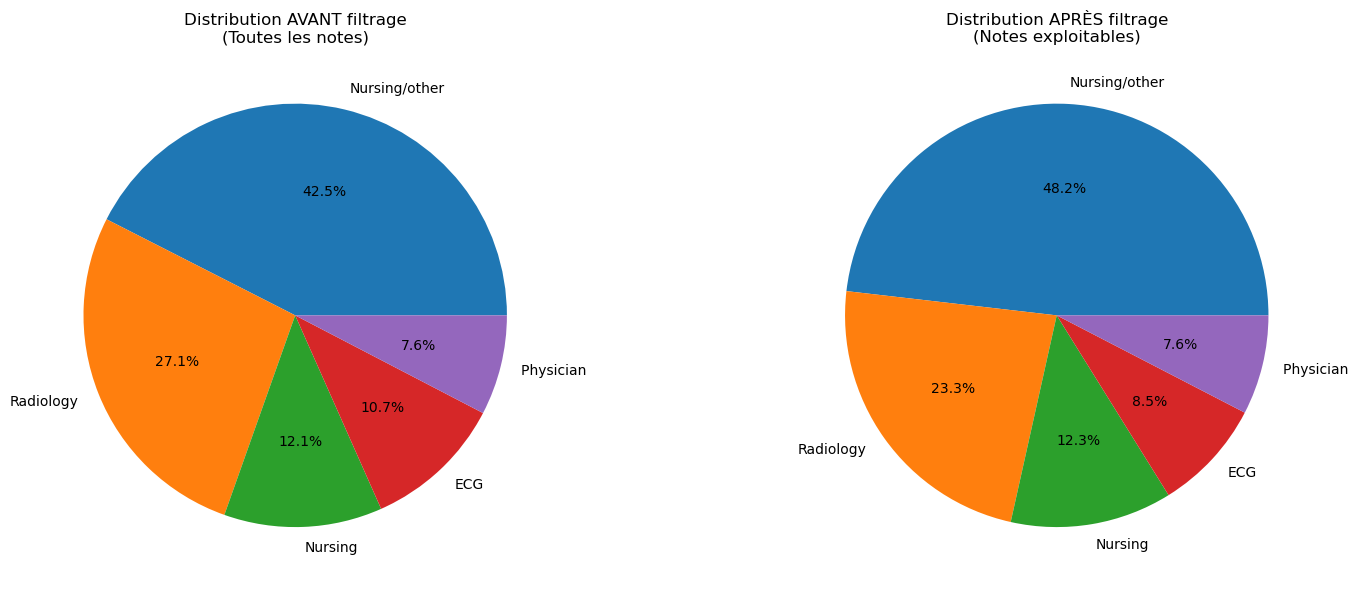

In [49]:
# Visualisation comparative
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Avant filtrage
axes[0].pie(notes['CATEGORY'].value_counts().head(5), 
            labels=notes['CATEGORY'].value_counts().head(5).index,
            autopct='%1.1f%%')
axes[0].set_title('Distribution AVANT filtrage\n(Toutes les notes)')

# Après filtrage
axes[1].pie(category_exploitable.head(5), 
            labels=category_exploitable.head(5).index,
            autopct='%1.1f%%')
axes[1].set_title('Distribution APRÈS filtrage\n(Notes exploitables)')

plt.tight_layout()
plt.show()

In [50]:
# 8.4 Diagnostics exploitables
diagnoses_exploitables = diagnoses[
    (diagnoses['SUBJECT_ID'].isin(patients_communs)) & 
    (diagnoses['HADM_ID'].isin(hadm_communs))
]
print(f"\nDiagnostics exploitables : {len(diagnoses_exploitables):,} ({len(diagnoses_exploitables)/len(diagnoses)*100:.1f}% du total)")


Diagnostics exploitables : 30,802 (21.9% du total)


In [51]:
# 8.5 Vérification finale de qualité
print("\n VÉRIFICATION QUALITÉ DES DONNÉES EXPLOITABLES :")
print(f"  - Notes avec HADM_ID : {notes_exploitables['HADM_ID'].notna().sum():,} (100%)")
print(f"  - Notes avec texte non vide : {(notes_exploitables['TEXT'].notna() & (notes_exploitables['TEXT'] != '')).sum():,}")
print(f"  - Diagnostics avec code ICD : {diagnoses_exploitables['ICD9_CODE'].notna().sum():,}")


 VÉRIFICATION QUALITÉ DES DONNÉES EXPLOITABLES :
  - Notes avec HADM_ID : 84,140 (100%)
  - Notes avec texte non vide : 84,140
  - Diagnostics avec code ICD : 30,800


### ============================================
### 9. ANALYSE PAR PERSONA (PREVIEW)
### ============================================

In [52]:
# 9.1 Définir mapping personas
persona_mapping = {
    'Urgentiste': ['Physician', 'ECG', 'Echo'],
    'Généraliste': ['Discharge summary'],
    'Radiologue': ['Radiology'],
    'Infirmier': ['Nursing', 'Nursing/other'],
    'Autre': []
}


In [53]:
def assign_persona(category):
    for persona, categories in persona_mapping.items():
        if category in categories:
            return persona
    return 'Autre'

notes_exploitables['persona_target'] = notes_exploitables['CATEGORY'].apply(assign_persona)

/var/folders/rk/lx_hryp913x75xkqm9xb8fd40000gn/T/ipykernel_88149/2582448269.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notes_exploitables['persona_target'] = notes_exploitables['CATEGORY'].apply(assign_persona)



 Distribution des notes par persona cible :
persona_target
Infirmier      46912
Radiologue     18091
Urgentiste      8177
Autre           8150
Généraliste     2810
Name: count, dtype: int64


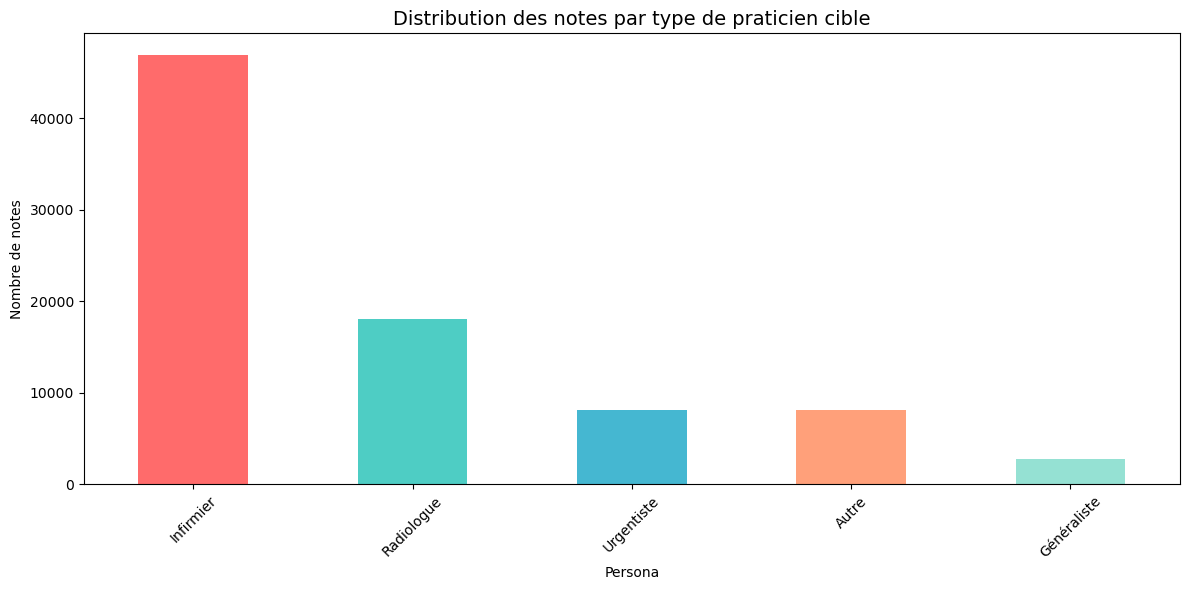

In [54]:
# 9.2 Distribution par persona
print("\n Distribution des notes par persona cible :")
persona_dist = notes_exploitables['persona_target'].value_counts()
print(persona_dist)

# Visualisation
plt.figure(figsize=(12, 6))
persona_dist.plot(kind='bar', color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#95E1D3'])
plt.title('Distribution des notes par type de praticien cible', fontsize=14)
plt.xlabel('Persona')
plt.ylabel('Nombre de notes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



 Longueur moyenne par persona :
                Count  Mean_length  Median_length  Std_length
persona_target                                               
Autre            8150       5538.0         5827.0      3095.0
Généraliste      2810       9768.0         8956.0      5730.0
Infirmier       46912       1013.0          799.0       868.0
Radiologue      18091       1678.0         1313.0      1110.0
Urgentiste       8177        614.0          225.0       894.0


<Figure size 1400x600 with 0 Axes>

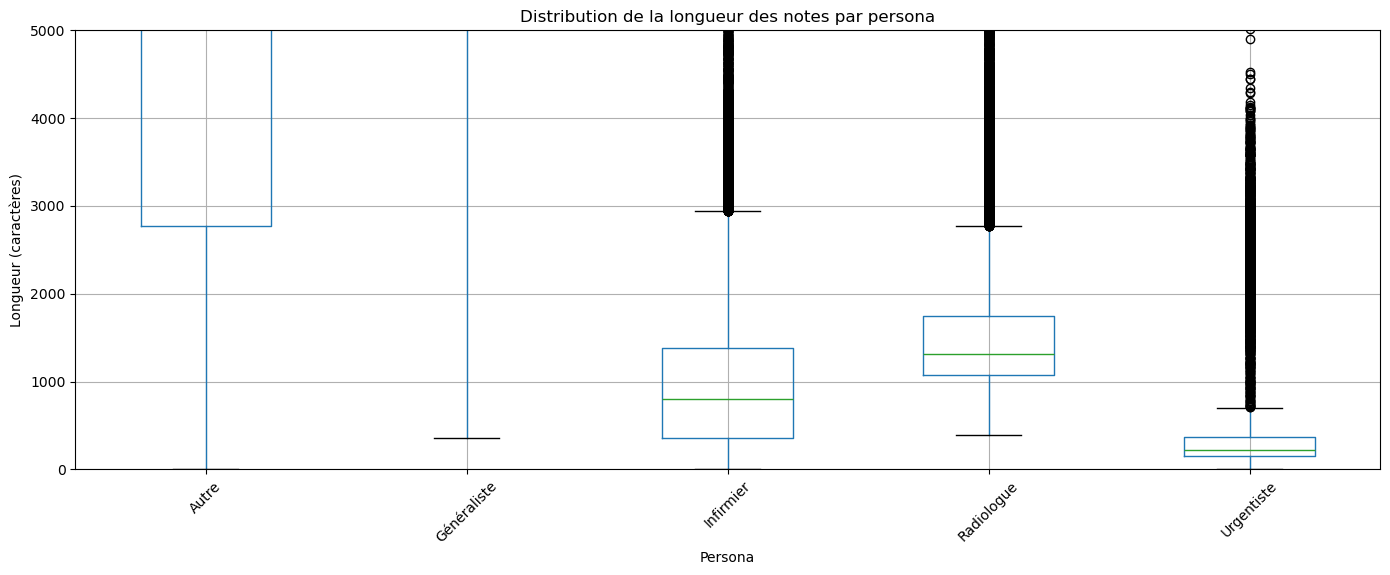

In [55]:
# 9.3 Statistiques textuelles par persona
print("\n Longueur moyenne par persona :")
stats_persona = notes_exploitables.groupby('persona_target').agg({
    'text_length': ['count', 'mean', 'median', 'std']
}).round(0)
stats_persona.columns = ['Count', 'Mean_length', 'Median_length', 'Std_length']
print(stats_persona)

# Visualisation boxplot
plt.figure(figsize=(14, 6))
notes_exploitables.boxplot(column='text_length', by='persona_target', figsize=(14, 6))
plt.title('Distribution de la longueur des notes par persona')
plt.suptitle('')  # Supprimer titre auto
plt.ylabel('Longueur (caractères)')
plt.xlabel('Persona')
plt.xticks(rotation=45)
plt.ylim(0, 5000)  # Limiter pour meilleure visibilité
plt.tight_layout()
plt.show()

In [56]:
# 9.4 Pathologies typiques par persona
print("\n Top 5 pathologies par persona :")

for persona in ['Urgentiste', 'Généraliste', 'Radiologue']:
    # Filtrer notes de ce persona
    notes_persona = notes_exploitables[notes_exploitables['persona_target'] == persona]
    
    # Joindre avec diagnostics
    notes_persona_diag = notes_persona.merge(
        diagnoses_enriched[['SUBJECT_ID', 'HADM_ID', 'SHORT_TITLE', 'SEQ_NUM']],
        on=['SUBJECT_ID', 'HADM_ID'],
        how='inner'
    )
    
    # Diagnostics principaux seulement
    diag_principal = notes_persona_diag[notes_persona_diag['SEQ_NUM'] == 1]
    
    print(f"\n{persona.upper()} :")
    top_diag = diag_principal['SHORT_TITLE'].value_counts().head(5)
    for diag, count in top_diag.items():
        print(f"  - {diag}: {count}")


 Top 5 pathologies par persona :

URGENTISTE :
  - Subendo infarct, initial: 603
  - Crnry athrscl natve vssl: 562
  - Septicemia NOS: 368
  - Acute respiratry failure: 273
  - Aortic valve disorder: 202

GÉNÉRALISTE :
  - Crnry athrscl natve vssl: 159
  - Septicemia NOS: 118
  - Subendo infarct, initial: 91
  - Aortic valve disorder: 68
  - Acute respiratry failure: 58

RADIOLOGUE :
  - Septicemia NOS: 781
  - Acute respiratry failure: 645
  - Crnry athrscl natve vssl: 594
  - Subendo infarct, initial: 499
  - Intracerebral hemorrhage: 447


### ============================================
### 9. ANALYSE DES COMORBIDITÉS
### ============================================


 Distribution du nombre de diagnostics par hospitalisation :
count    2778.000000
mean       11.087113
std         6.408013
min         0.000000
25%         6.000000
50%         9.000000
75%        15.000000
max        39.000000
Name: num_diagnoses, dtype: float64


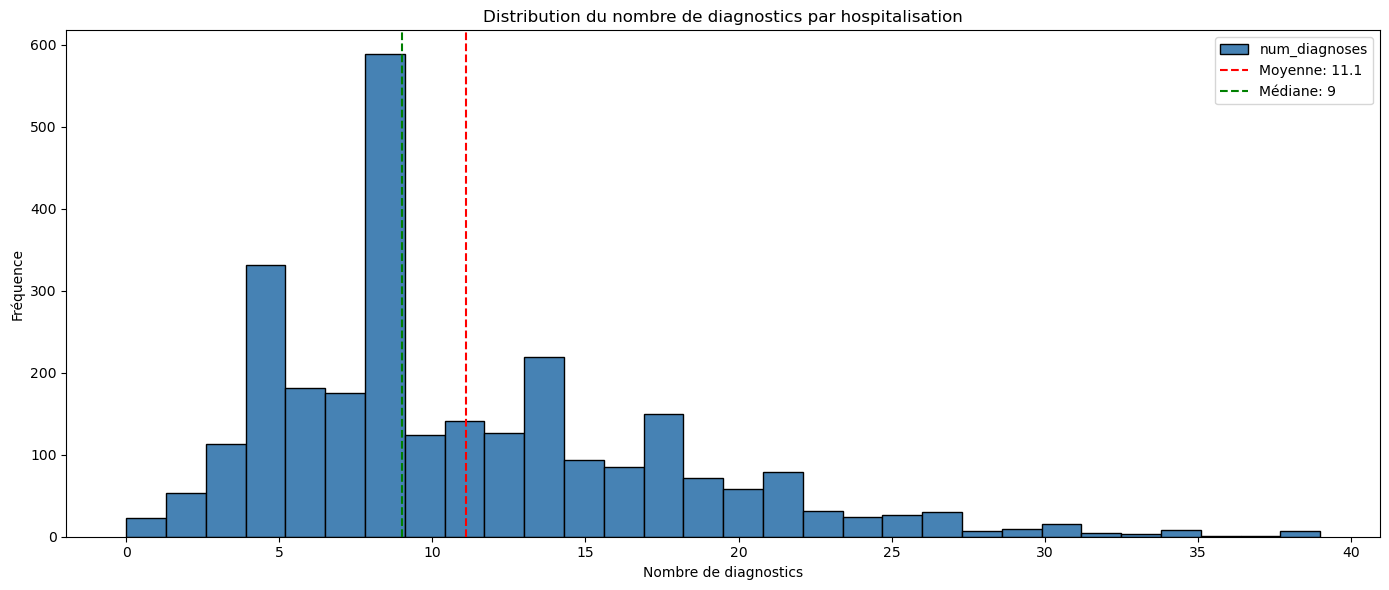

In [57]:
# 9.1 Grouper diagnostics par hospitalisation
comorbidities = diagnoses_exploitables.groupby(['SUBJECT_ID', 'HADM_ID']).agg({
    'ICD9_CODE': list,
    'SEQ_NUM': 'count'
}).reset_index()
comorbidities.columns = ['SUBJECT_ID', 'HADM_ID', 'diagnosis_list', 'num_diagnoses']

print(f"\n Distribution du nombre de diagnostics par hospitalisation :")
print(comorbidities['num_diagnoses'].describe())

# Visualisation
plt.figure(figsize=(14, 6))
comorbidities['num_diagnoses'].plot(kind='hist', bins=30, edgecolor='black', color='steelblue')
plt.title('Distribution du nombre de diagnostics par hospitalisation')
plt.xlabel('Nombre de diagnostics')
plt.ylabel('Fréquence')
plt.axvline(comorbidities['num_diagnoses'].mean(), color='red', linestyle='--', label=f"Moyenne: {comorbidities['num_diagnoses'].mean():.1f}")
plt.axvline(comorbidities['num_diagnoses'].median(), color='green', linestyle='--', label=f"Médiane: {comorbidities['num_diagnoses'].median():.0f}")
plt.legend()
plt.tight_layout()
plt.show()


 Classification complexité des cas :
complexity
Complexe (8-12)        979
Très complexe (>12)    923
Modéré (4-7)           687
Simple (1-3)           187
Name: count, dtype: int64


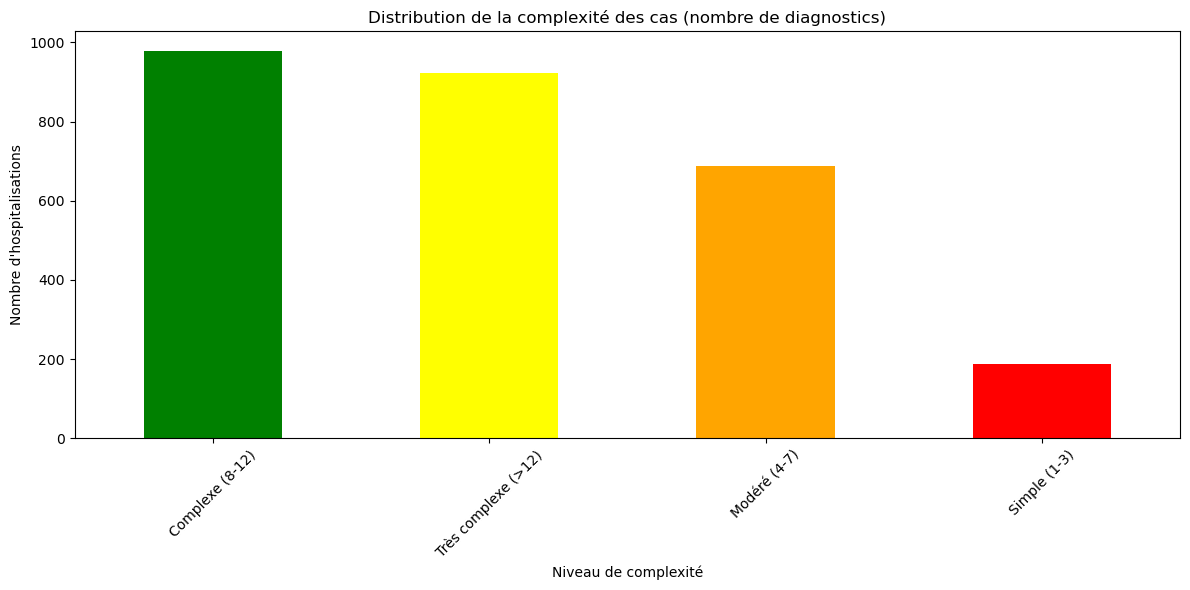

In [58]:
# 9.2 Classifier complexité des cas
comorbidities['complexity'] = pd.cut(
    comorbidities['num_diagnoses'],
    bins=[0, 3, 7, 12, 100],
    labels=['Simple (1-3)', 'Modéré (4-7)', 'Complexe (8-12)', 'Très complexe (>12)']
)

print("\n Classification complexité des cas :")
print(comorbidities['complexity'].value_counts())

plt.figure(figsize=(12, 6))
comorbidities['complexity'].value_counts().plot(kind='bar', color=['green', 'yellow', 'orange', 'red'])
plt.title('Distribution de la complexité des cas (nombre de diagnostics)')
plt.xlabel('Niveau de complexité')
plt.ylabel('Nombre d\'hospitalisations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
# 9.3 Paires de diagnostics fréquentes (exemple simple)
from itertools import combinations

print("\n🔗 Top 10 paires de diagnostics fréquentes :")

# Enrichir comorbidités avec descriptions
comorbidities_desc = diagnoses_enriched.groupby(['SUBJECT_ID', 'HADM_ID'])['SHORT_TITLE'].apply(list).reset_index()

pairs = []
for diag_list in comorbidities_desc['SHORT_TITLE'].head(1000):  # Échantillon pour performance
    if len(diag_list) >= 2:
        # Nettoyer NaN
        diag_clean = [d for d in diag_list if pd.notna(d)]
        if len(diag_clean) >= 2:
            # Prendre top 3 diagnostics par patient
            for pair in combinations(diag_clean[:3], 2):
                pairs.append(tuple(sorted(pair)))

from collections import Counter
pair_freq = Counter(pairs)

for pair, count in pair_freq.most_common(10):
    print(f"  {count:3d}x : {pair[0]} + {pair[1]}")


🔗 Top 10 paires de diagnostics fréquentes :
   64x : Need prphyl vc vrl hepat + Single lb in-hosp w/o cs
   50x : NB obsrv suspct infect + Single lb in-hosp w/o cs
   44x : NB obsrv suspct infect + Need prphyl vc vrl hepat
   23x : Crnry athrscl natve vssl + Intermed coronary synd
   14x : Routine circumcision + Single lb in-hosp w/o cs
   14x : Neonat jaund preterm del + Respiratory distress syn
   13x : CHF NOS + Crnry athrscl natve vssl
   13x : Respiratory distress syn + Single lb in-hosp w cs
   12x : Need prphyl vc vrl hepat + Routine circumcision
   12x : Pneumonia, organism NOS + Septicemia NOS


### ============================================
### 10. ANALYSE TEMPORELLE
### ============================================

In [60]:
# 10.1 Convertir dates
notes_exploitables['CHARTDATE'] = pd.to_datetime(notes_exploitables['CHARTDATE'], errors='coerce')
notes_exploitables['year'] = notes_exploitables['CHARTDATE'].dt.year
notes_exploitables['month'] = notes_exploitables['CHARTDATE'].dt.month
notes_exploitables['day_of_week'] = notes_exploitables['CHARTDATE'].dt.dayofweek

/var/folders/rk/lx_hryp913x75xkqm9xb8fd40000gn/T/ipykernel_88149/2348302937.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notes_exploitables['CHARTDATE'] = pd.to_datetime(notes_exploitables['CHARTDATE'], errors='coerce')
/var/folders/rk/lx_hryp913x75xkqm9xb8fd40000gn/T/ipykernel_88149/2348302937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  notes_exploitables['year'] = notes_exploitables['CHARTDATE'].dt.year
/var/folders/rk/lx_hryp913x75xkqm9xb8fd40000gn/T/ipykernel_88149/2348302937.py:4: Settin


 Distribution des notes par année :
year
2100     235
2101     795
2102     481
2103     830
2104     467
        ... 
2198     732
2199     511
2200    1262
2201     725
2202       3
Name: count, Length: 103, dtype: int64


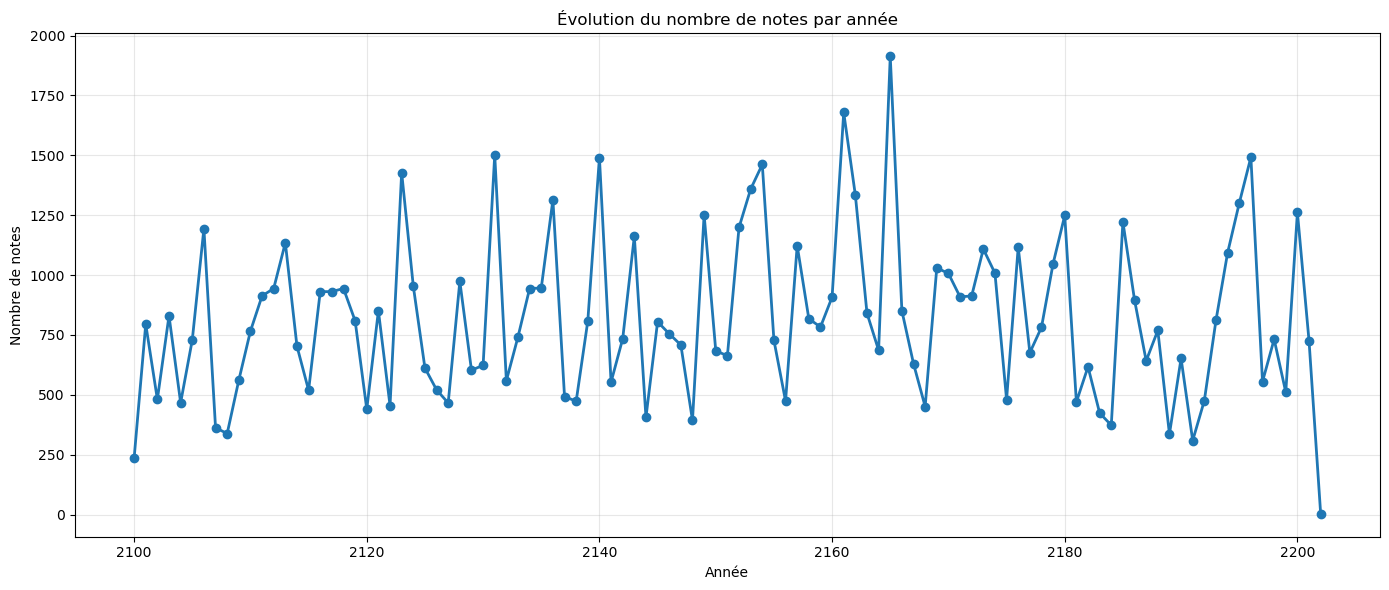

In [61]:
# 10.2 Distribution par année
print("\n Distribution des notes par année :")
year_dist = notes_exploitables['year'].value_counts().sort_index()
print(year_dist)

# Visualisation
plt.figure(figsize=(14, 6))
year_dist.plot(kind='line', marker='o', linewidth=2)
plt.title('Évolution du nombre de notes par année')
plt.xlabel('Année')
plt.ylabel('Nombre de notes')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


 Distribution par mois (saisonnalité potentielle) :
month
1     7014
2     6319
3     7415
4     8766
5     8308
6     5443
7     6468
8     6411
9     6669
10    6951
11    6679
12    7697
Name: count, dtype: int64


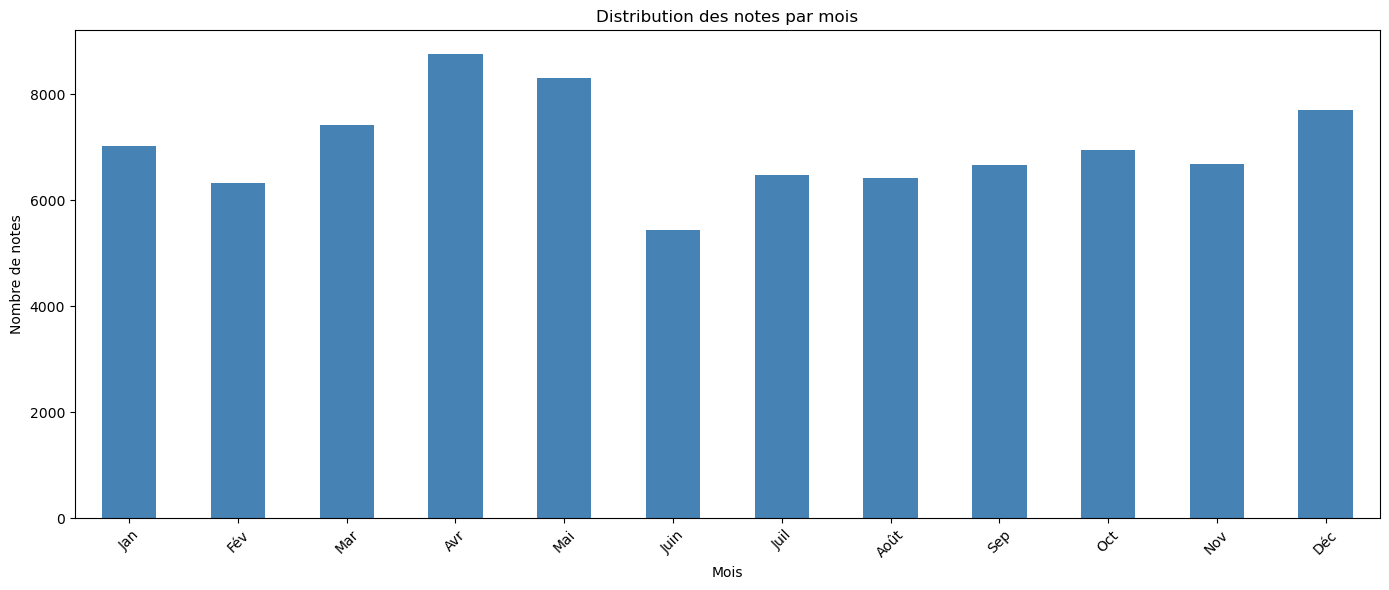

In [62]:
# 10.3 Saisonnalité (mois)
print("\n Distribution par mois (saisonnalité potentielle) :")
month_dist = notes_exploitables['month'].value_counts().sort_index()
print(month_dist)

plt.figure(figsize=(14, 6))
month_dist.plot(kind='bar', color='steelblue')
plt.title('Distribution des notes par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de notes')
plt.xticks(range(12), ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Juin', 
                        'Juil', 'Août', 'Sep', 'Oct', 'Nov', 'Déc'], rotation=45)
plt.tight_layout()
plt.show()

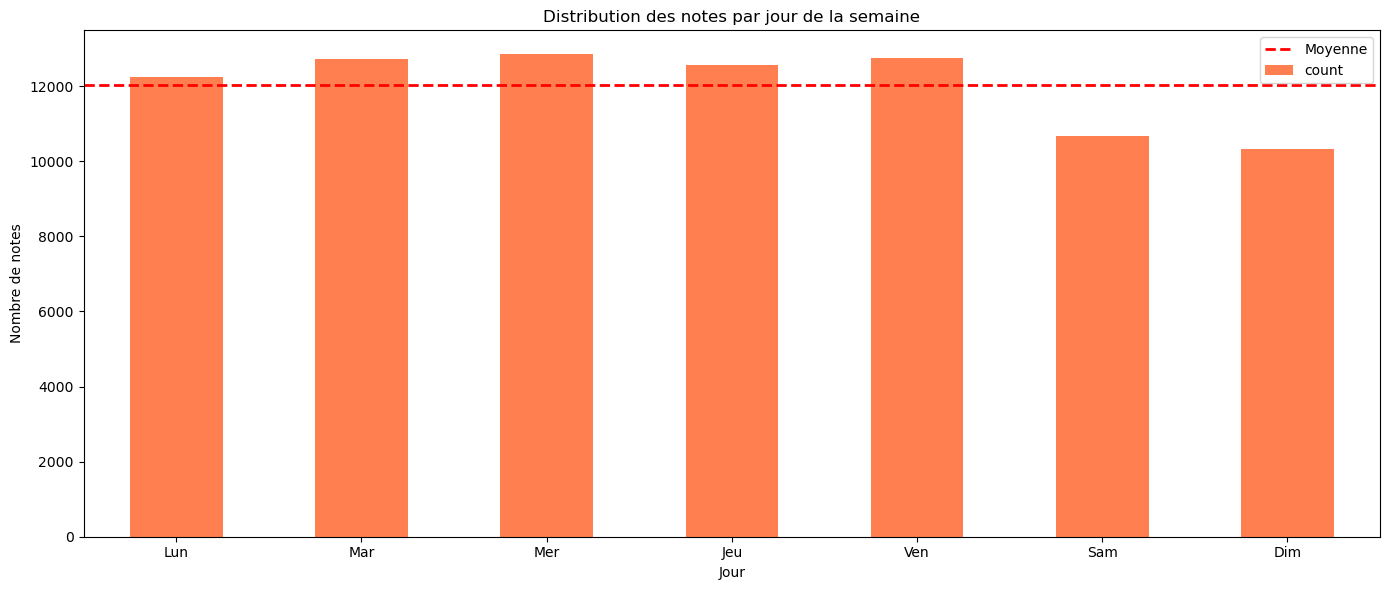


💡 INSIGHT :
  - Notes en semaine : 63,142
  - Notes week-end : 20,998
  - Ratio week-end/semaine : 33.26%
  → Activité soutenue le week-end (urgences)


In [63]:
# 10.4 Jour de semaine (urgences week-end vs semaine)
dow_dist = notes_exploitables['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
dow_dist.plot(kind='bar', color='coral')
plt.title('Distribution des notes par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de notes')
plt.xticks(range(7), ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'], rotation=0)
plt.axhline(dow_dist.mean(), color='red', linestyle='--', label='Moyenne', linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

# Insight week-end vs semaine
weekday_notes = dow_dist[0:5].sum()
weekend_notes = dow_dist[5:7].sum()
print(f"\n💡 INSIGHT :")
print(f"  - Notes en semaine : {weekday_notes:,}")
print(f"  - Notes week-end : {weekend_notes:,}")
print(f"  - Ratio week-end/semaine : {weekend_notes/weekday_notes:.2%}")
if weekend_notes/weekday_notes < 0.3:
    print("  → Beaucoup moins d'activité le week-end (admissions programmées)")
else:
    print("  → Activité soutenue le week-end (urgences)")

### ============================================
### 10. ANALYSE DE QUALITÉ DÉTAILLÉE
### ============================================

In [64]:
# 10.1 Distribution longueur des textes par catégorie
print("\n📏 Statistiques longueur par catégorie (top 5) :")
length_by_cat = notes_exploitables.groupby('CATEGORY')['text_length'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(0).sort_values('count', ascending=False).head(5)
print(length_by_cat)


📏 Statistiques longueur par catégorie (top 5) :
               count    mean  median     std  min    max
CATEGORY                                                
Nursing/other  37341   808.0   659.0   621.0    4   3785
Radiology      18091  1678.0  1313.0  1110.0  395  13293
Nursing         9571  1816.0  1592.0  1176.0    4  11458
ECG             6622   213.0   194.0   102.0    3    807
Physician       5891  6948.0  6864.0  2311.0    7  19014


In [65]:
# 10.2 Identifier notes problématiques
print("\n NOTES PROBLÉMATIQUES :")

# Notes très courtes
very_short = notes_exploitables[notes_exploitables['text_length'] < 50]
print(f"  - Notes < 50 caractères : {len(very_short):,} ({len(very_short)/len(notes_exploitables)*100:.1f}%)")

# Notes très longues (outliers)
very_long = notes_exploitables[notes_exploitables['text_length'] > 20000]
print(f"  - Notes > 20,000 caractères : {len(very_long):,} ({len(very_long)/len(notes_exploitables)*100:.1f}%)")

# Notes avec texte vide ou NaN
empty_text = notes_exploitables[notes_exploitables['TEXT'].isna() | (notes_exploitables['TEXT'] == '')]
print(f"  - Notes avec texte vide : {len(empty_text):,}")


 NOTES PROBLÉMATIQUES :
  - Notes < 50 caractères : 284 (0.3%)
  - Notes > 20,000 caractères : 131 (0.2%)
  - Notes avec texte vide : 0


In [66]:


# 10.3 Qualité des diagnostics
print("\n🏥 QUALITÉ DES DIAGNOSTICS :")

# Diagnostics sans SEQ_NUM
missing_seq = diagnoses_exploitables[diagnoses_exploitables['SEQ_NUM'].isna()]
print(f"  - Diagnostics sans SEQ_NUM : {len(missing_seq):,}")

# Diagnostics sans description
missing_desc = diagnoses_enriched[diagnoses_enriched['SHORT_TITLE'].isna()]
print(f"  - Diagnostics sans description : {len(missing_desc):,} ({len(missing_desc)/len(diagnoses_enriched)*100:.1f}%)")



🏥 QUALITÉ DES DIAGNOSTICS :
  - Diagnostics sans SEQ_NUM : 2
  - Diagnostics sans description : 3,431 (2.4%)


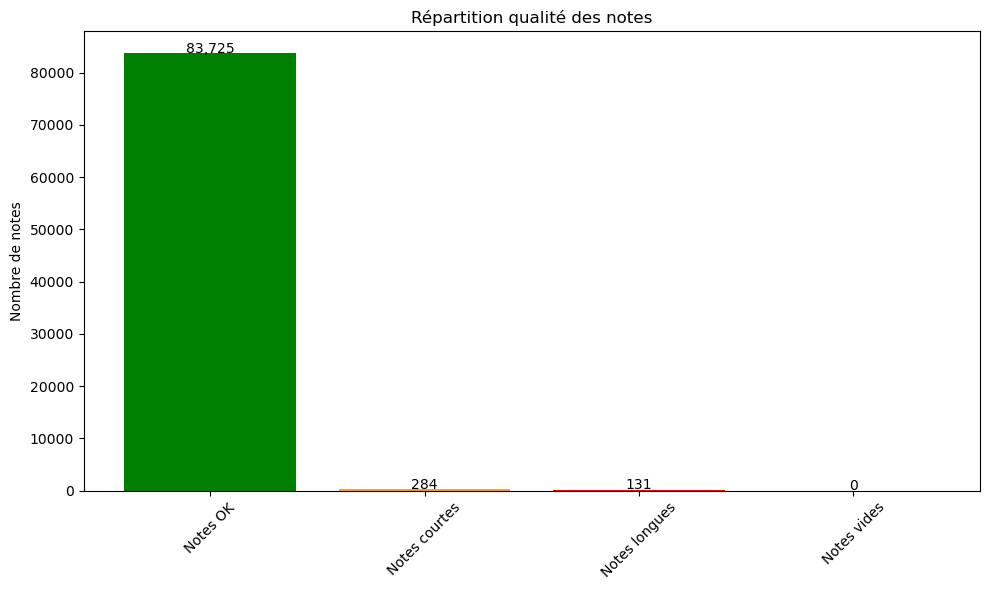

In [67]:
# 10.4 Visualisation qualité globale
quality_categories = pd.DataFrame({
    'Catégorie': ['Notes OK', 'Notes courtes', 'Notes longues', 'Notes vides'],
    'Count': [
        len(notes_exploitables[(notes_exploitables['text_length'] >= 50) & (notes_exploitables['text_length'] <= 20000)]),
        len(very_short),
        len(very_long),
        len(empty_text)
    ]
})

plt.figure(figsize=(10, 6))
plt.bar(quality_categories['Catégorie'], quality_categories['Count'], 
        color=['green', 'orange', 'red', 'darkred'])
plt.title('Répartition qualité des notes')
plt.ylabel('Nombre de notes')
plt.xticks(rotation=45)
for i, v in enumerate(quality_categories['Count']):
    plt.text(i, v + 100, f"{v:,}", ha='center')
plt.tight_layout()
plt.show()

In [ ]:


print("\n" + "=" * 60)
print("💡 SYNTHÈSE FINALE & INSIGHTS CLÉS")
print("=" * 60)

# Créer un rapport synthétique
synthesis_report = f"""
╔══════════════════════════════════════════════════════════════╗
║           SYNTHÈSE EXPLORATION DONNÉES MIMIC-III             ║
╚══════════════════════════════════════════════════════════════╝

 DONNÉES BRUTES DISPONIBLES :
  • Notes médicales : {len(notes):,}
  • Patients totaux : {notes['SUBJECT_ID'].nunique():,}
  • Hospitalisations totales : {notes['HADM_ID'].nunique():,}
  • Diagnostics : {len(diagnoses):,}

 DONNÉES EXPLOITABLES (après filtrage) :
  • Patients communs : {len(patients_communs):,}
  • Hospitalisations communes : {len(hadm_communs):,}
  • Notes exploitables : {len(notes_exploitables):,} ({len(notes_exploitables)/len(notes)*100:.1f}%)
  • Diagnostics exploitables : {len(diagnoses_exploitables):,}

 DISTRIBUTION PAR PERSONA :
  • Urgentiste : {persona_dist.get('Urgentiste', 0):,} notes
  • Généraliste : {persona_dist.get('Généraliste', 0):,} notes
  • Radiologue : {persona_dist.get('Radiologue', 0):,} notes
  • Infirmier : {persona_dist.get('Infirmier', 0):,} notes

 ASPECTS MÉDICAUX :
  • Moyenne diagnostics/patient : {comorbidities['num_diagnoses'].mean():.1f}
  • Médiane diagnostics/patient : {comorbidities['num_diagnoses'].median():.0f}
  • Top diagnostic : {diagnoses_exploitables['ICD9_CODE'].value_counts().index[0]}
  • Cas complexes (>12 diag) : {(comorbidities['num_diagnoses'] > 12).sum():,}

 PROBLÈMES IDENTIFIÉS :
  • Notes sans HADM_ID : {(notes['HADM_ID'].isna()).sum():,} ({(notes['HADM_ID'].isna()).sum()/len(notes)*100:.1f}%)
  • Codes ICD sans description : {len(missing_desc):,}
  • Overlap patients limité : {len(patients_communs)/10000*100:.1f}%
  • Notes très courtes à filtrer : {len(very_short):,}

🎯 RECOMMANDATIONS POUR NETTOYAGE :
  1.  Filtrer sur patients/hospitalisations communs
  2.  Supprimer colonnes inutiles (ISERROR, STORETIME, CGID)
  3. Filtrer notes < 50 caractères
  4.  Gérer codes ICD sans description
  5.  Convertir dates en datetime
  6.  Nettoyer textes (dates anonymisées)

 CONCLUSION :
  Dataset suffisant pour projet PPE après nettoyage !
  Environ {len(notes_exploitables):,} notes exploitables avec diagnostics.
  Données de bonne qualité avec diversité de catégories et pathologies.
"""

print(synthesis_report)

# Sauvegarder le rapport
with open('../data/staging/exploration_synthesis.txt', 'w', encoding='utf-8') as f:
    f.write(synthesis_report)

print("\nRapport de synthèse sauvegardé : data/staging/exploration_synthesis.txt")
print("\n EXPLORATION TERMINÉE ! Prêt pour le nettoyage.")




💡 SYNTHÈSE FINALE & INSIGHTS CLÉS

╔══════════════════════════════════════════════════════════════╗
║           SYNTHÈSE EXPLORATION DONNÉES MIMIC-III             ║
╚══════════════════════════════════════════════════════════════╝

 DONNÉES BRUTES DISPONIBLES :
  • Notes médicales : 458,090
  • Patients totaux : 10,000
  • Hospitalisations totales : 12,722
  • Diagnostics : 140,502

 DONNÉES EXPLOITABLES (après filtrage) :
  • Patients communs : 2,145
  • Hospitalisations communes : 2,778
  • Notes exploitables : 84,140 (18.4%)
  • Diagnostics exploitables : 30,802

 DISTRIBUTION PAR PERSONA :
  • Urgentiste : 8,177 notes
  • Généraliste : 2,810 notes
  • Radiologue : 18,091 notes
  • Infirmier : 46,912 notes

🏥 ASPECTS MÉDICAUX :
  • Moyenne diagnostics/patient : 11.1
  • Médiane diagnostics/patient : 9
  • Top diagnostic : 4019
  • Cas complexes (>12 diag) : 923

⚠️ PROBLÈMES IDENTIFIÉS :
  • Notes sans HADM_ID : 49,656 (10.8%)
  • Codes ICD sans description : 3,431
  • Overlap patie